# Natural Language Processing (NLP) of unstructured Business Negotiation Data

### written by Alexander Meinert, Benjamin Kusch and Lisette Latell

This project focuses on applying Natural Language Processing (NLP) and Machine Learning (ML) techniques to analyze business negotiations across various use case scenarios. The dataset includes approximately 2,200 negotiation interactions, with both accepted and rejected outcomes. Our primary objective is to extract meaningful communication-based indicators and utilize them to model and predict negotiation results.

The textual negotiation messages analyzed in this project are sourced from the Negoisst database. Negoisst is a Negotiation Support System (NSS) designed to facilitate electronic business negotiations, offering different tools and features to support B2B negotiation processes effectively.

#### The central research question guiding our work is:

#### "To what extent can the success of negotiations (in the sense of negotiation acceptance or rejection) be predicted based on communication interaction data by using NLP and Machine Learning techniques?"

In order to find a comprehensive and precise answer to this question, we will take the following important steps in our approach:

1. Text-based Data Exploration and Cleansing: Analyzing and understanding the structure and distribution of negotiation interaction data and also addressing issues like missing data, inconsistencies, and noise in the textual data.
2. Text-based Data (Pre-)Processing: Transforming raw textual data into a suitable format for analysis (e.g. Tokenization, Stemming, and Lemmatization).
3. Text Representation Techniques: Utilizing various techniques to convert text into machine-readable formats (BoW, TF-IDF, Word Embeddings).
4. Modeling: Employing both classical ML techniques and modern language models (e.g. LSTM, BERT) to predict negotiation outcomes.

## Text-based Data Exploration and Cleansing

In [1]:
# Importing essential libraries for data manipulation and analysis.
import numpy as np  # For numerical operations and handling arrays.
import pandas as pd  # For working with structured data in DataFrames.

# Importing libraries for data visualization.
import matplotlib.pyplot as plt  # For creating static visualizations.
import seaborn as sns  # For enhanced and aesthetic statistical plots.

# Importing libraries for text processing.
import nltk  # For natural language processing tasks (tokenization, stemming).
import string  # For string manipulation (removing punctuation).
import re  # For working with regular expressions (pattern matching in text).

# Suppressing warnings to maintain a clean and readable output.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Excel file into a DataFrame, using the first column as the index.
df = pd.read_excel('Data_Group2.xlsx', index_col=0)
df

,ReceiverID,ActionType,NegoOutcome,Content
SenderID,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ..."
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte..."
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am..."
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ..."
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil..."
...,...,...,...,...
851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."


In [3]:
# Calculate and display the total number of missing values in each column of the DataFrame.
df.isnull().sum()

ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [4]:
# Create a new column named 'Length' to store the character count of each entry in the 'Content' column.
df['Length'] = df['Content'].str.len()
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length
SenderID,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349
32,31,Clarification,FinalAccept,"Dear Alex, Thanks for elaborating. Let's pop t...",134
31,32,FinalAccept,FinalAccept,Great! Hereby my official confirmation of the ...,113
33,34,Offer,FinalAccept,"Dear Chris, Hopefully you are doing well. Ther...",2220
34,33,Counteroffer,FinalAccept,"Dear Alex, Thanks a lot for your message! I am...",2282


In [5]:
# Define a function to count the number of words in a given text.
def word_count(content):
    content_list = content.split() # Split the text into words based on whitespace.
    return len(content_list) # Return the total number of words.

# Apply the word_count function to the 'Content' column and create a new column named 'Word count of nego message' to store values.
df['Word count of nego message'] = df['Content'].apply(word_count)
df.head(10)

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message
SenderID,,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778,309
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949,337
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693,123
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452,77
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349,249
32,31,Clarification,FinalAccept,"Dear Alex, Thanks for elaborating. Let's pop t...",134,22
31,32,FinalAccept,FinalAccept,Great! Hereby my official confirmation of the ...,113,18
33,34,Offer,FinalAccept,"Dear Chris, Hopefully you are doing well. Ther...",2220,381
34,33,Counteroffer,FinalAccept,"Dear Alex, Thanks a lot for your message! I am...",2282,407


In [6]:
# Count and display occurrences of each unique value in 'NegoOutcome' column.
df['NegoOutcome'].value_counts()

NegoOutcome
FinalAccept    1795
FinalReject     459
Name: count, dtype: int64

In [7]:
# Filter and store the 'Content' of rows where 'NegoOutcome' is 'FinalAccept' into a new DataFrame.
accepted_messages = df[df['NegoOutcome']=='FinalAccept']['Content']
accepted_messages

SenderID
31      Hey Chris, Great that we are working together ...
32      Hey Alex, The pleasure is all mine. For starte...
31      Hey Chris,  Thank you for your response.  I am...
32      Hello Alex, I think we have a solid compromis ...
31      Dear Chris, I am glad to hear that you are wil...
                              ...                        
1151    Dear Chris Meyer,\nIm happy that you accepted ...
1156    Dr. Mr Kramer,\nthank you for your fast reply....
1151    Dear Mr.Chris Meyer,\nI understand your proble...
1156    Dear Mr. Kramer,\nI propose we think out of th...
1151    Dear Mr.Meyer,\nThank you for your last offer....
Name: Content, Length: 1795, dtype: object

In [8]:
# Access and display the second message (at index 1) from the filtered results.
accepted_messages.values[1]

"Hey Alex, The pleasure is all mine. For starters, I think it is important to acknowledge that the ISA plans to use the event as leverage to assure a successful start for the new office in Saint Petersburg.  This can be assured by establishing contacts to as many local business people and officials as possible. So we should partly adapt to the local culture. In that way, we can show the new members and guests that they are important and make them feel appreciated. Since they are needed for a successful start. Therefore we have to make changes in the catering and/or music act. My proposal is as following: The catering will be a local Russian cuisine. Our Russian contacts will highly appreciate the effort we are making and will experience it as a sort of celebration of their culture. This will enhance our chances regarding reaching business agreements based on mutual consent in the future. I agree with week 3 as the date of conference. DJ Happy is a very famous DJ but he might overshadow

In [9]:
# Amount of accepted messages.
accepted_messages.count()

1795

In [10]:
# Filter messages with a 'FinalReject' outcome.
rejected_messages = df[df['NegoOutcome']=='FinalReject']['Content']
rejected_messages

SenderID
95     Hi Chris! I feel like we're really getting som...
96     Hi Alex, Thank you for your propositions. Howe...
95     Hi Chris! Thank you for your propositions as w...
96     Hi Alex, Thank you for your ideas. Also, you c...
95     Hi Chris, Thank you for your quick response! I...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 459, dtype: object

In [11]:
# Access the second message (index 1) from the rejected messages.
rejected_messages.values[1]

'Hi Alex, Thank you for your propositions. However i do not agree with some of them. For the Catering, a lot of important people will be present, it is a opportunity to creat long lasting bond with them. A formal dinner is more suitable for those CEO or spokespersons, it will show them that we care. In addition what could be better than local food for the local business owner. I am sur that we can find a chief to cook specialities everyone like. I agree for the week 3. A too famous artist could put the ISA event in the second plan and it is defenitly not the appropriate artist for that kind of event. A local russian band will show that we can adapt to this new country. I am glad that you think i am a good host, but what kind of experience do you have in show hosting? I know you are still a student. I did several months of internship and i am used to talk to businessmen. In addition i think your former proposition describe your taste in party, that is why i think I should host the speec

In [12]:
# Count the number of rejected messages.
rejected_messages.count()

459

In [13]:
from sklearn import preprocessing

# Map 'FinalReject' to 0 and 'FinalAccept' to 1 in 'NegoOutcome' and create a new column.
df['NegoOutcomeLabel'] = df.NegoOutcome.map({'FinalReject': 0, 'FinalAccept': 1})

df.head()

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message,NegoOutcomeLabel
SenderID,,,,,,,
31,32,Offer,FinalAccept,"Hey Chris, Great that we are working together ...",1778,309,1
32,31,Counteroffer,FinalAccept,"Hey Alex, The pleasure is all mine. For starte...",1949,337,1
31,32,Counteroffer,FinalAccept,"Hey Chris, Thank you for your response. I am...",693,123,1
32,31,Counteroffer,FinalAccept,"Hello Alex, I think we have a solid compromis ...",452,77,1
31,32,Question,FinalAccept,"Dear Chris, I am glad to hear that you are wil...",1349,249,1


Text(0.5, 1.0, 'Rejected Messages')

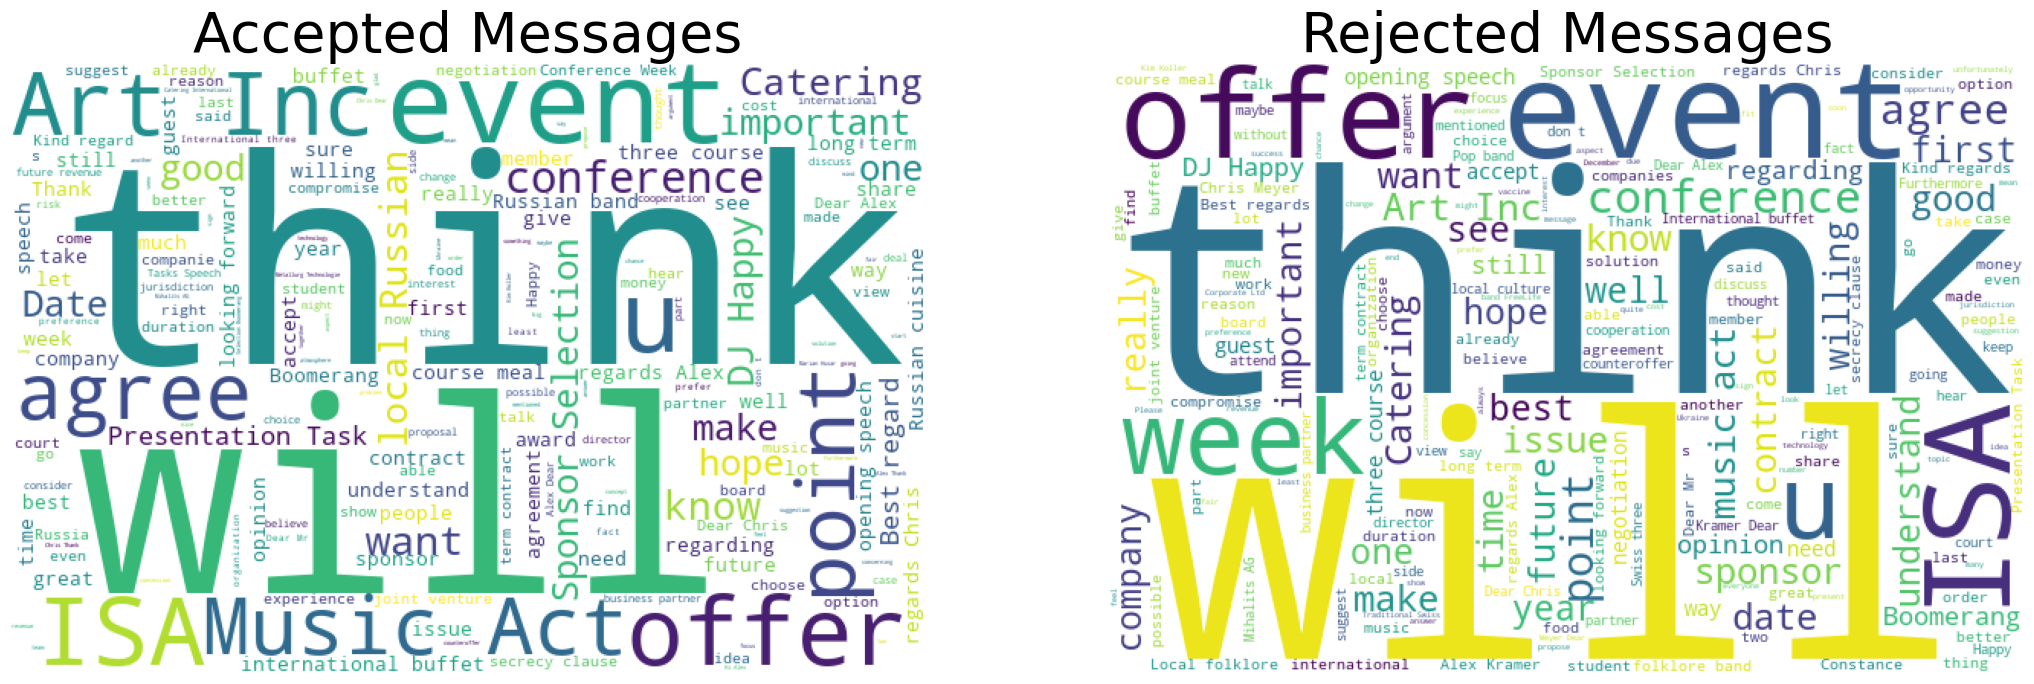

In [14]:
# Import WordCloud for visualizing text data.
from wordcloud import WordCloud

# Create a figure with two subplots for the word clouds.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

# Generate and display the word cloud for accepted messages.
wordcloud1 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(accepted_messages))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Accepted Messages', fontsize=40)

# Generate and display the word cloud for rejected messages.
wordcloud2 = WordCloud(background_color='white', width=600, height=400).generate(" ".join(rejected_messages))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Rejected Messages', fontsize=40)

After some data exploration and cleaning, we can see that there are a total of 2,254 negotiation messages, of which 1,795 resulted in a final acceptance and 459 resulted in a final rejection of the negotiation. There are also no missing values in the given DataFrame. Lastly, the word clouds show that the same words occur with similar frequency for both possible terminations of a negotiation.

## Text-based Processing

In [15]:
# Extract all messages from the 'Content' column.
all_messages = df["Content"]
all_messages

SenderID
31     Hey Chris, Great that we are working together ...
32     Hey Alex, The pleasure is all mine. For starte...
31     Hey Chris,  Thank you for your response.  I am...
32     Hello Alex, I think we have a solid compromis ...
31     Dear Chris, I am glad to hear that you are wil...
                             ...                        
851    Dear Chis Meyer,\n \nthank you for your latest...
856    Dear Alex Kramer,\nthank you very much for you...
851    Dear Chris Meyer,\nthank you for your fast ans...
856    Dear Alex Kramer,\nI am still very interested ...
851    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2254, dtype: object

In [16]:
def clean_text(message):
    message = message.lower() # Convert the message to lowercase.
    
    message = re.sub('\[.*?\]', '', message) # Remove text inside square brackets.
    message = re.sub('https?://\S+|www\.\S+', '', message) # Remove URLs starting with http, https, or www.
    message = re.sub('<.*?>+', '', message) # Remove HTML tags.
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message) # Remove all punctuation.
    message = re.sub('\n', '', message) # Remove newline characters.
    message = re.sub('\w*\d\w*', '', message) # Remove words containing digits.

    return message

In [17]:
# Clean each message in the 'Content' column using the clean_text function.
df["Content"] = df["Content"].apply(lambda x: clean_text(x))
df["Content"].head()

SenderID
31    hey chris great that we are working together f...
32    hey alex the pleasure is all mine for starters...
31    hey chris  thank you for your response  i am g...
32    hello alex i think we have a solid compromis a...
31    dear chris i am glad to hear that you are will...
Name: Content, dtype: object

In [18]:
# Initialize a tokenizer to extract words from text using a regex pattern.
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Tokenize each message in the 'Content' column, handling only string entries.
df['Content'] = df['Content'].apply(lambda x: tokenizer.tokenize(x) if isinstance(x, str) else x)

df['Content'].head()

SenderID
31    [hey, chris, great, that, we, are, working, to...
32    [hey, alex, the, pleasure, is, all, mine, for,...
31    [hey, chris, thank, you, for, your, response, ...
32    [hello, alex, i, think, we, have, a, solid, co...
31    [dear, chris, i, am, glad, to, hear, that, you...
Name: Content, dtype: object

In [19]:
import nltk # Import the nltk library.
nltk.download('stopwords') # Download the stopwords dataset for text processing.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lila9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Import the list of English stopwords.
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

In [21]:
# Define a function to remove stopwords from a list of words.
def remove_stopwords(text):
    # Filter out words that are in the list of English stopwords.
    words = [w for w in text if w not in stopwords.words('english')]
    return words

# Remove stopwords from the 'Content' column.
df['Content'] = df['Content'].apply(lambda x: remove_stopwords(x))

df['Content'].head()

SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starters, think, i...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object

In [22]:
# Create two identical DataFrames, one will use stemming and the other will use lemmatization.
stemm_df = df.copy()  # DataFrame for stemming.
lemm_df = df.copy()   # DataFrame for lemmatization.

# Display the 'Content' column for both DataFrames.
stemm_df['Content']  # Content to be processed with stemming.
lemm_df['Content']  # Content to be processed with lemmatization.

SenderID
31     [hey, chris, great, working, together, competi...
32     [hey, alex, pleasure, mine, starters, think, i...
31     [hey, chris, thank, response, glad, hear, agre...
32     [hello, alex, think, solid, compromis, settled...
31     [dear, chris, glad, hear, willing, accept, ter...
                             ...                        
851    [dear, chis, meyer, thank, latest, offer, poin...
856    [dear, alex, kramerthank, much, latest, offer,...
851    [dear, chris, meyerthank, fast, answer, happy,...
856    [dear, alex, krameri, still, interested, comin...
851    [dear, chris, meyer, im, sorry, accept, less, ...
Name: Content, Length: 2254, dtype: object

In [23]:
print(lemm_df['Content'].head())

SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starters, think, i...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object


In [24]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer.
stemmer = PorterStemmer()

# Define a function to apply stemming to a list of tokens.
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the 'Content' column, processing strings or lists of tokens.
stemm_df['Content'] = stemm_df['Content'].apply(lambda x: stem_tokens(x.split()) if isinstance(x, str) else stem_tokens(x))

print(stemm_df['Content'].head())

SenderID
31    [hey, chri, great, work, togeth, competit, her...
32    [hey, alex, pleasur, mine, starter, think, imp...
31    [hey, chri, thank, respons, glad, hear, agre, ...
32    [hello, alex, think, solid, compromi, settl, w...
31    [dear, chri, glad, hear, will, accept, term, c...
Name: Content, dtype: object


In [25]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer.
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a list of tokens.
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the 'Content' column.
lemm_df['Content'] = lemm_df['Content'].apply(lemmatize_tokens)

print(lemm_df['Content'].head())

SenderID
31    [hey, chris, great, working, together, competi...
32    [hey, alex, pleasure, mine, starter, think, im...
31    [hey, chris, thank, response, glad, hear, agre...
32    [hello, alex, think, solid, compromis, settled...
31    [dear, chris, glad, hear, willing, accept, ter...
Name: Content, dtype: object


In [26]:
# Define a function to combine a list of tokens into a single string.
def combine_text(list_of_text):
    return ' '.join(list_of_text)  # Join tokens with spaces.

# Create a copy of the original DataFrame to preserve the original data.
df_combined = df.copy()

# Combine tokens in the 'Content' column into single strings.
df_combined['Content'] = df_combined['Content'].apply(lambda x: combine_text(x))

df_combined['Content']

SenderID
31     hey chris great working together competition h...
32     hey alex pleasure mine starters think importan...
31     hey chris thank response glad hear agree date ...
32     hello alex think solid compromis settled willi...
31     dear chris glad hear willing accept terms come...
                             ...                        
851    dear chis meyer thank latest offer points comp...
856    dear alex kramerthank much latest offer happy ...
851    dear chris meyerthank fast answer happy found ...
856    dear alex krameri still interested coming join...
851    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2254, dtype: object

In [27]:
# Display the first 5 rows of the combined DataFrame to inspect the updated 'Content' column.
df_combined.head()

,ReceiverID,ActionType,NegoOutcome,Content,Length,Word count of nego message,NegoOutcomeLabel
SenderID,,,,,,,
31,32,Offer,FinalAccept,hey chris great working together competition h...,1778,309,1
32,31,Counteroffer,FinalAccept,hey alex pleasure mine starters think importan...,1949,337,1
31,32,Counteroffer,FinalAccept,hey chris thank response glad hear agree date ...,693,123,1
32,31,Counteroffer,FinalAccept,hello alex think solid compromis settled willi...,452,77,1
31,32,Question,FinalAccept,dear chris glad hear willing accept terms come...,1349,249,1


In [28]:
# Save the original DataFrame to a CSV file.
df.to_csv('df.csv', index=False)

# Save the combined DataFrame (with tokens combined into strings) to a CSV file.
df_combined.to_csv('df_combined.csv', index=False)

# Save the stemmed DataFrame to a CSV file.
stemm_df.to_csv('stemm_df.csv', index=False)

# Save the lemmatized DataFrame to a CSV file.
lemm_df.to_csv('lemm_daf.csv', index=False)

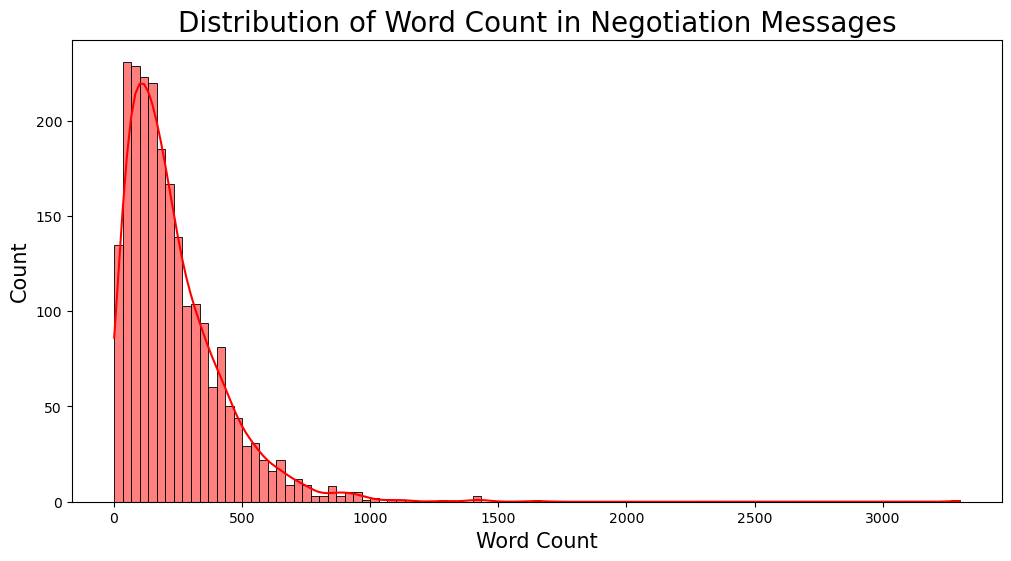

In [29]:
# Import libraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to visualize the distribution of word count in negotiation messages.
plt.figure(figsize=(12, 6))
sns.histplot(df['Word count of nego message'], kde=True, color='red')
plt.title('Distribution of Word Count in Negotiation Messages', fontsize=20)
plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

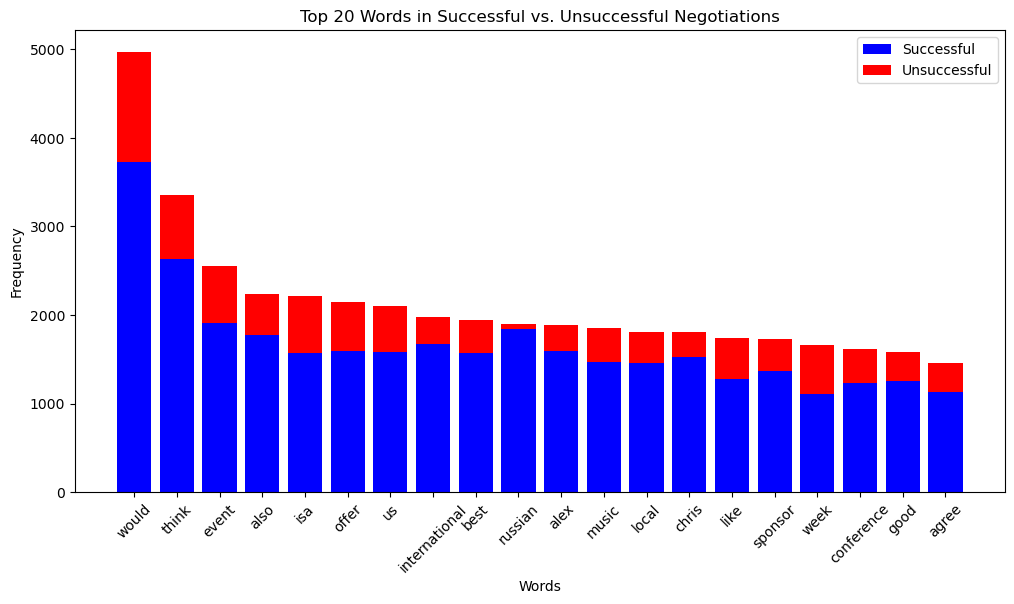

In [30]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def plot_top_words_by_outcome(df, text_column='Content', label_column='NegoOutcomeLabel', top_n=20):
    # Separate texts for successful and unsuccessful negotiations.
    successful_text = ' '.join(df[df[label_column] == 1][text_column])
    unsuccessful_text = ' '.join(df[df[label_column] == 0][text_column])
    
    # Tokenize and clean text.
    successful_words = re.findall(r'\b\w+\b', successful_text.lower())
    unsuccessful_words = re.findall(r'\b\w+\b', unsuccessful_text.lower())
    
    # Count word frequencies.
    successful_counts = Counter(successful_words)
    unsuccessful_counts = Counter(unsuccessful_words)
    
    # Combine counts and get the top N words.
    combined_counts = successful_counts + unsuccessful_counts
    common_words = combined_counts.most_common(top_n)
    
    # Extract counts for successful and unsuccessful cases.
    words = [word for word, _ in common_words]
    success_counts = [successful_counts[word] for word in words]
    unsuccess_counts = [unsuccessful_counts[word] for word in words]
    
    # Plot the word frequencies.
    x = range(len(words))
    plt.figure(figsize=(12, 6))
    plt.bar(x, success_counts, color='blue', label='Successful')
    plt.bar(x, unsuccess_counts, color='red', label='Unsuccessful', bottom=success_counts)
    
    plt.xticks(x, words, rotation=45)
    plt.title(f'Top {top_n} Words in Successful vs. Unsuccessful Negotiations')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage with df_combined.
plot_top_words_by_outcome(df_combined, text_column='Content', label_column='NegoOutcomeLabel', top_n=20)

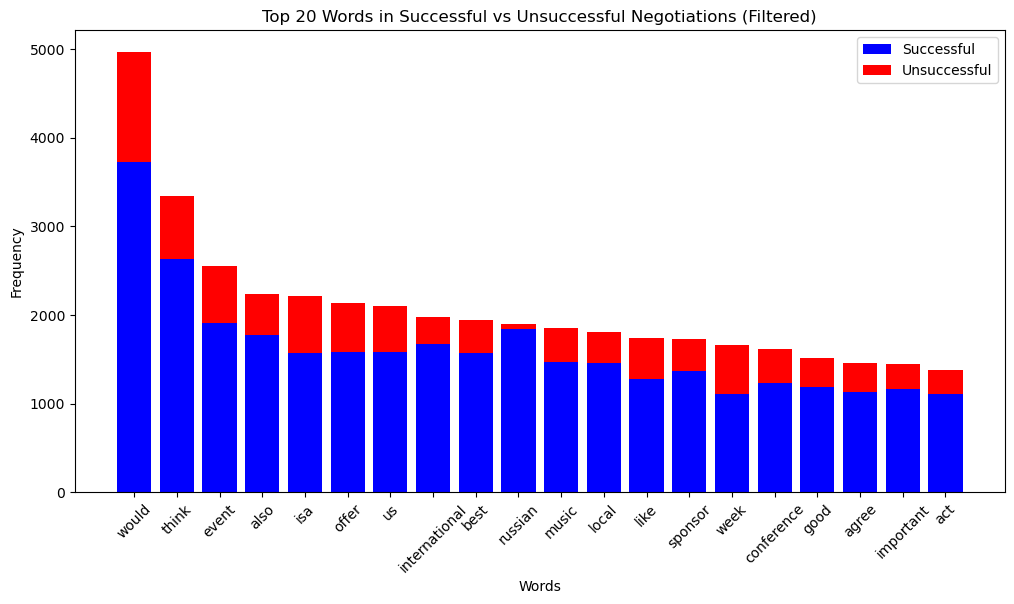

In [31]:
def plot_top_words_filtered_by_name(df, text_column='Content', label_column='NegoOutcomeLabel', top_n=20):
    # Filter out the first two words if they contain names.
    def filter_names(text):
        words = text.split()  # Split text into words.
        if len(words) > 2:  # Check if there are at least two words.
            words = words[2:]  # Remove the first two words.
        return ' '.join(words)  # Rejoin remaining words.

    # Apply the filtering function to the text column.
    df[text_column] = df[text_column].apply(filter_names)
    
    # Separate texts for successful and unsuccessful negotiations.
    successful_text = ' '.join(df[df[label_column] == 1][text_column])
    unsuccessful_text = ' '.join(df[df[label_column] == 0][text_column])
    
    # Tokenize and clean text.
    successful_words = re.findall(r'\b\w+\b', successful_text.lower())
    unsuccessful_words = re.findall(r'\b\w+\b', unsuccessful_text.lower())
    
    # Count word occurrences.
    successful_counts = Counter(successful_words)
    unsuccessful_counts = Counter(unsuccessful_words)
    
    # Combine counts and keep the top N words.
    combined_counts = successful_counts + unsuccessful_counts
    common_words = combined_counts.most_common(top_n)
    
    # Extract counts for successful and unsuccessful cases.
    words = [word for word, _ in common_words]
    success_counts = [successful_counts[word] for word in words]
    unsuccess_counts = [unsuccessful_counts[word] for word in words]
    
    # Plot the word frequencies.
    x = range(len(words))
    plt.figure(figsize=(12, 6))
    plt.bar(x, success_counts, color='blue', label='Successful')
    plt.bar(x, unsuccess_counts, color='red', label='Unsuccessful', bottom=success_counts)
    
    plt.xticks(x, words, rotation=45)
    plt.title(f'Top {top_n} Words in Successful vs Unsuccessful Negotiations (Filtered)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example usage with df_combined.
plot_top_words_filtered_by_name(df_combined, text_column='Content', label_column='NegoOutcomeLabel', top_n=20)

The messages were first cleaned up and converted to lowercase letters to ensure uniformity. The messages were then broken down into individual words using a word tokenizer, which were then processed further. Stop words were removed from the messages to eliminate common words that do not contribute to the meaning of the text.

Two separate DataFrames were created for further processing: one for stemming and one for lemmatization. The Porter Stemmer was applied to a DataFrame to remove prefixes and suffixes from the words and reduce them to their root forms. NLTK's WordNet Lemmatizer was applied to the other DataFrame to convert words to their meaningful root forms.

The first diagram reveals that most negotiation messages contain less than 500 words. An analysis of the top 20 words used in negotiations, regardless of whether they ended successfully or unsuccessfully, showed no significant words that could indicate the outcome of a negotiation.